# Stacked CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(224, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 224)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 224)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     258176    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

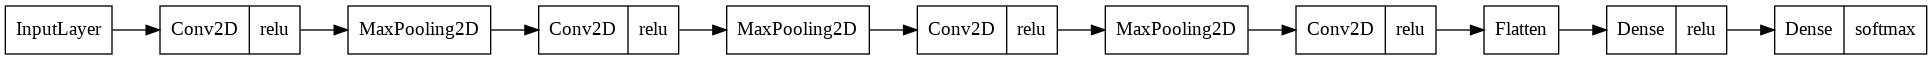

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, rankdir="LR", show_layer_names=False,show_layer_activations=True)

# VGG16

In [20]:
model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
inputs = model.layers[0].input

add_layer = model.layers[-1].output
add_layer = layers.Dense(128)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.Dense(64)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.GlobalAveragePooling2D()(add_layer)
outputs = layers.Dense(4, activation='softmax')(add_layer)

model = keras.Model(inputs, outputs)
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

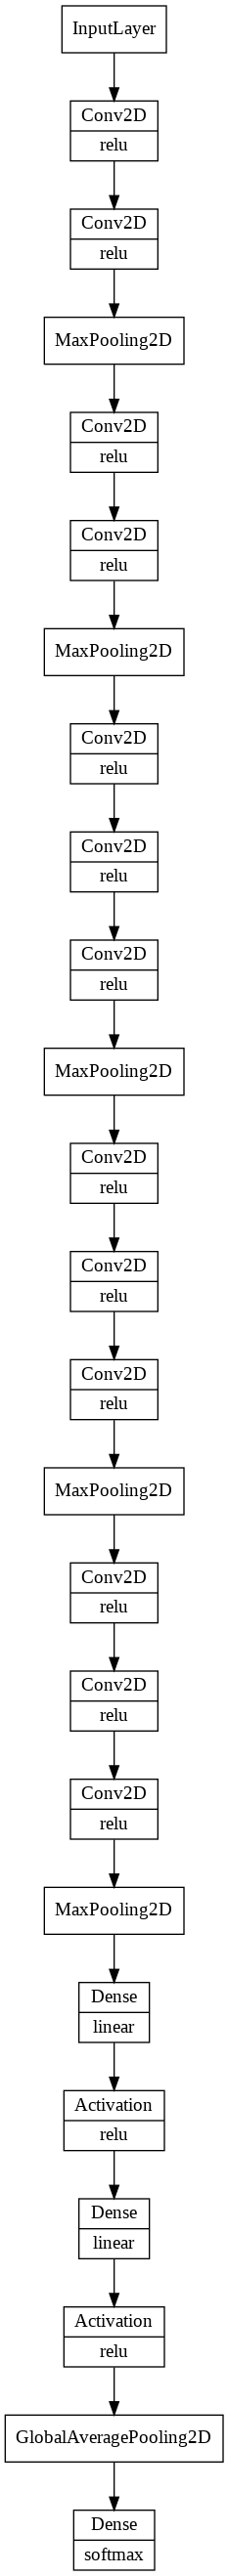

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, rankdir="TB", show_layer_names=False,show_layer_activations=True)

# ResNet50

In [23]:
model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
inputs = model.layers[0].input

add_layer = model.layers[-1].output
add_layer = layers.Dense(128)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.Dense(64)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.GlobalAveragePooling2D()(add_layer)
outputs = layers.Dense(4, activation='softmax')(add_layer)

model = keras.Model(inputs, outputs)
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

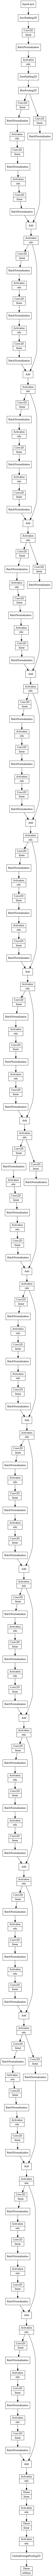

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, rankdir="TB", show_layer_names=False,show_layer_activations=True)